In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../../prepared_data/gurgaon_properties_post_feature_selection.csv')

In [4]:
df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,83.0,3,3,4,1.0,1900.0,1,0,0,0.0,2.0,1.69
1,0.0,97.0,3,3,3,3.0,1537.0,0,1,0,2.0,2.0,1.08
2,0.0,8.0,3,3,3,1.0,1490.0,0,0,0,2.0,2.0,1.30
3,1.0,15.0,3,2,1,3.0,128.0,0,0,0,1.0,1.0,0.44
4,0.0,107.0,4,4,0,3.0,2040.0,0,0,0,1.0,2.0,1.30


In [5]:
# one hot encode -> sector, balcony, agePossession, furnishing type, luxury category, floor category
# balcony,luxury should be ordinal encoded

In [6]:
X = df.drop(columns=['price'])
y = df['price']

In [7]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

<Axes: xlabel='price', ylabel='Count'>

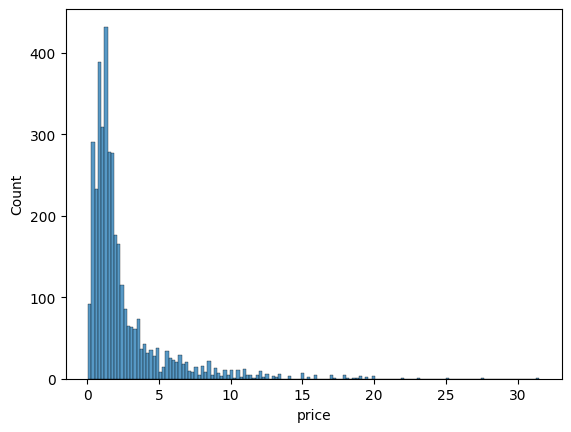

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(y) # as our output is right skewed we will convert this distribution to normal by taking log

In [10]:
# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

<Axes: xlabel='price', ylabel='Count'>

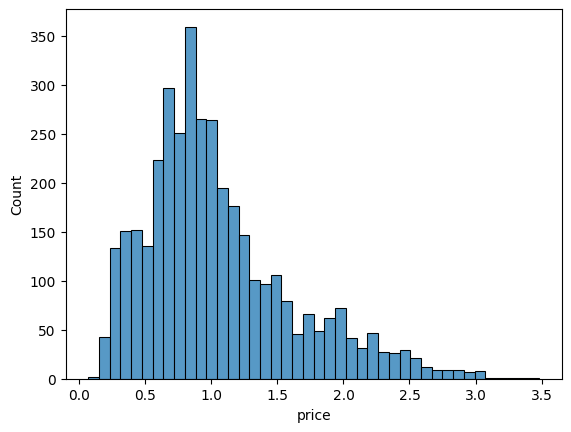

In [11]:
sns.histplot(y_transformed)

In [16]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'), columns_to_encode)
    ], 
    remainder='passthrough'
)

In [17]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

In [18]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

d:\datascience\Real_Estate\menv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
d:\datascience\Real_Estate\menv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [19]:
scores.mean()

0.8596533105209156

In [20]:
scores.std()

0.01964195044414489

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

In [22]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', SVR())])

In [23]:
y_pred = pipeline.predict(X_test)

In [24]:
y_pred = np.expm1(y_pred)

In [25]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred)

0.6513883423362732